In [54]:
!pip install dfply
import pandas as pd
import numpy as np
import math
from dfply import *
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statistics 
import plotly.graph_objects as go
from scipy import stats
from scipy.stats import pearsonr
import plotly.graph_objects as go
import warnings
from scipy.stats import shapiro
from datetime import date, timedelta

In [0]:
players = pd.read_pickle('/content/drive/My Drive/Capstone/Data/Clean/Players_Clean.pkl')
players = players[players.sofifa_id.notnull()]
players.sofifa_id = players.sofifa_id.astype("int") 

In [0]:
markval = pd.read_pickle("/content/drive/My Drive/Capstone/Data/Clean/markval_detailed.pkl")

In [0]:
gk_sofifa = pd.read_pickle("/content/drive/My Drive/Capstone/Data/Clean/by_position_sofifa/goalkeepers_Clean.pkl")

In [0]:
gk_sofifa["year"] = gk_sofifa["game_year"].apply(lambda x : x.year) 

In [0]:
gk_stats = pd.read_pickle("/content/drive/My Drive/Capstone/Data/Clean/gk_stats_wide.pkl")
gk_stats["year"] = gk_stats["date"].apply(lambda x : x.year)

In [0]:
gk_sofifa.drop(["player_positions","team_position"],axis = "columns", inplace = True)

In [0]:
gk_sofifa = pd.merge(gk_sofifa, players[["tm_id","sofifa_id"]])

In [0]:
gk_sofifa = pd.merge(gk_sofifa, markval, on = ["tm_id","year"])

In [0]:
def pair_plot(df):
  fig = px.scatter_matrix(df,labels=
                        {col:col.replace('_', ' ') for col in df.columns},
                        height = 900, width = 900
                        )
  fig.update_traces(diagonal_visible=False)
  fig.show()
  return fig

In [0]:
def heat_map(df, w = 30,h = 20):
  df = df.select_dtypes(include=['float64'])
  corr = df.corr()
  plt.figure(figsize = (w, h))
  ax = sns.heatmap(corr, annot = True, linewidths=.5)
  ax.tick_params(right=True, top=True, labelright=True, labeltop=True)
  plt.show()
  return plt

In [0]:
no_mv_cols = (gk_sofifa.select_dtypes(include=['float64']) >> select(~X.mv)).columns.tolist()
no_mv_cols.insert(0, "mv")
gk_sofifa_floats = gk_sofifa[no_mv_cols]

In [77]:
pp_gk_sofifa = pair_plot(gk_sofifa_floats)

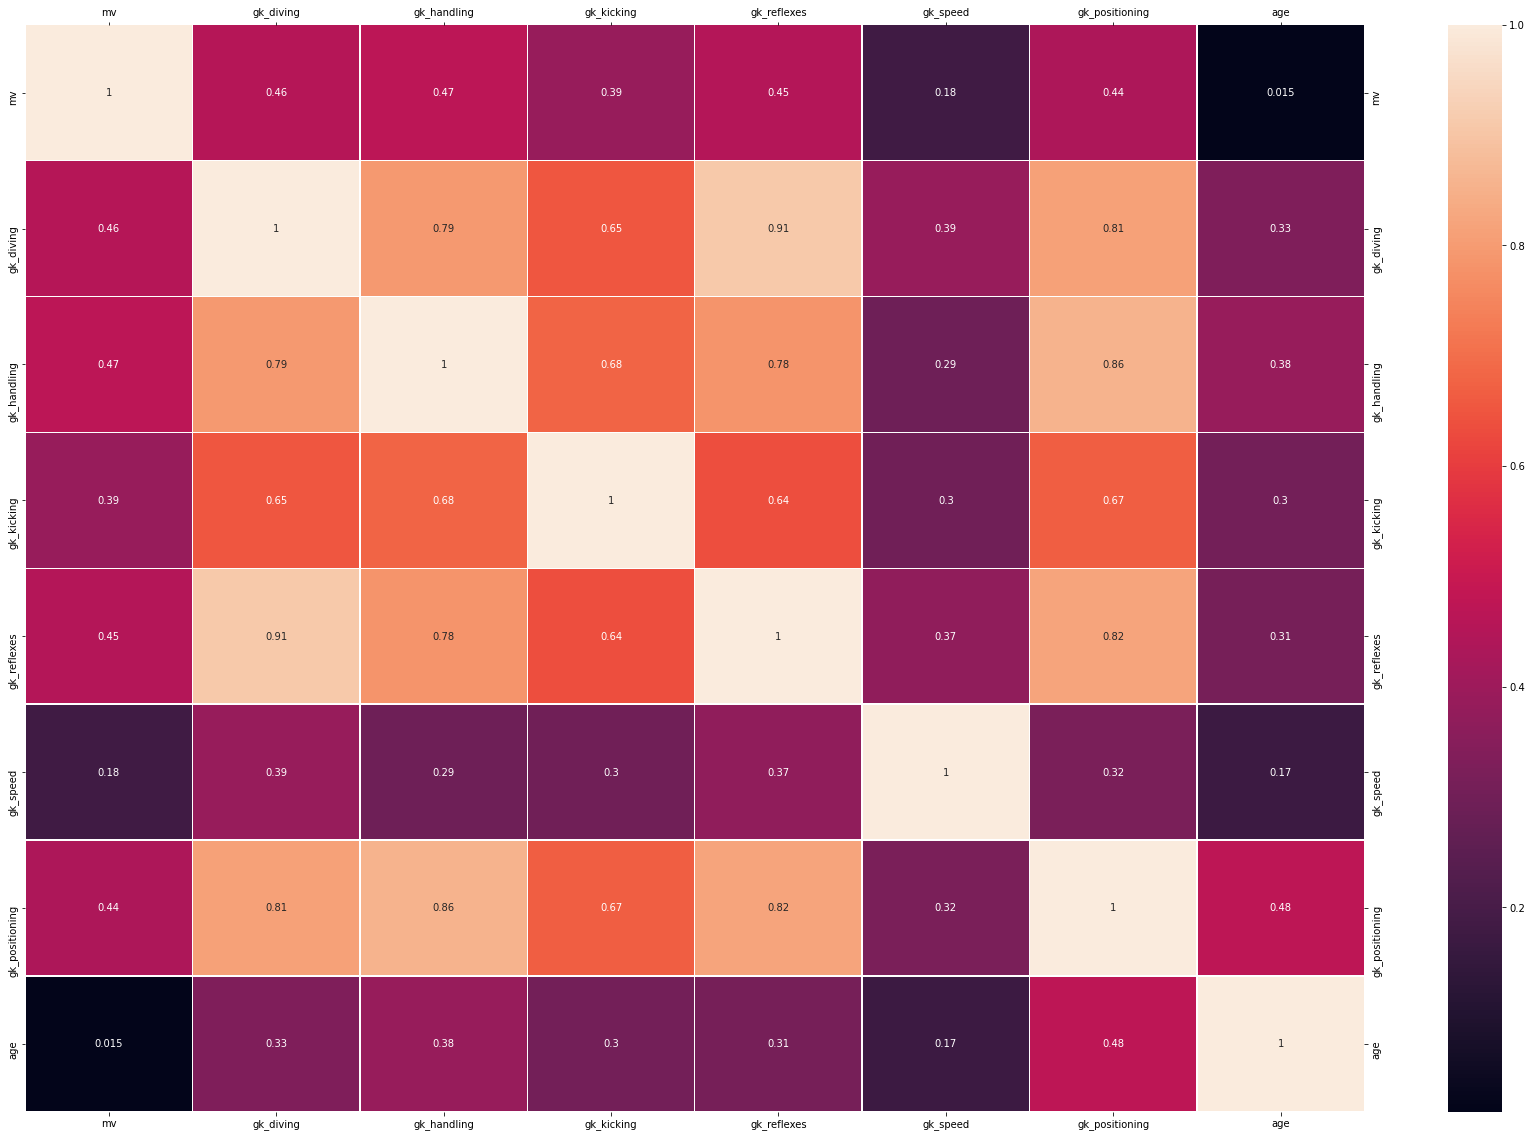

In [107]:
hm_gk_sofifa = heat_map(gk_sofifa_floats)

In [0]:
gk_sofifa_stats = pd.merge(gk_sofifa, gk_stats, on = ["tm_id", "year"])
no_mv_cols = (gk_sofifa_stats.select_dtypes(include=['float64']) >> select(~X.mv)).columns.tolist()
no_mv_cols.insert(0, "mv")
gk_stats_float = gk_sofifa_stats[no_mv_cols]

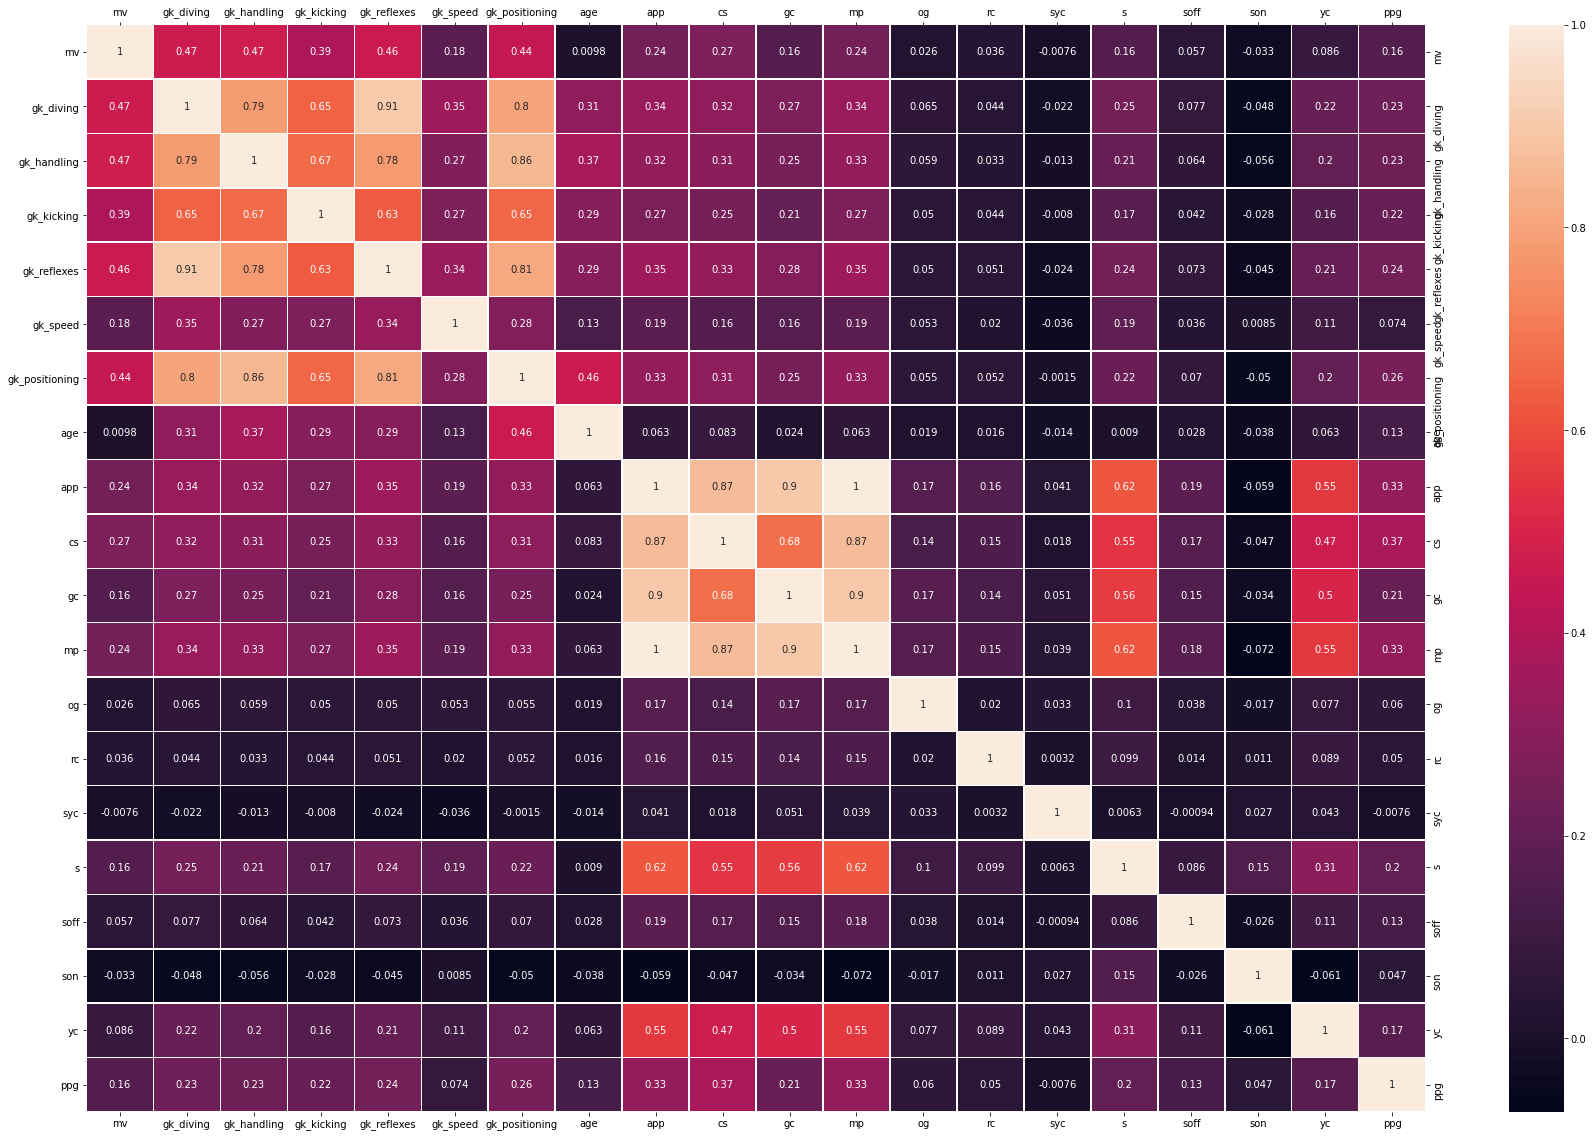

In [110]:
sofifa_real_hm = heat_map(gk_stats_float >> select(~starts_with('cum')))

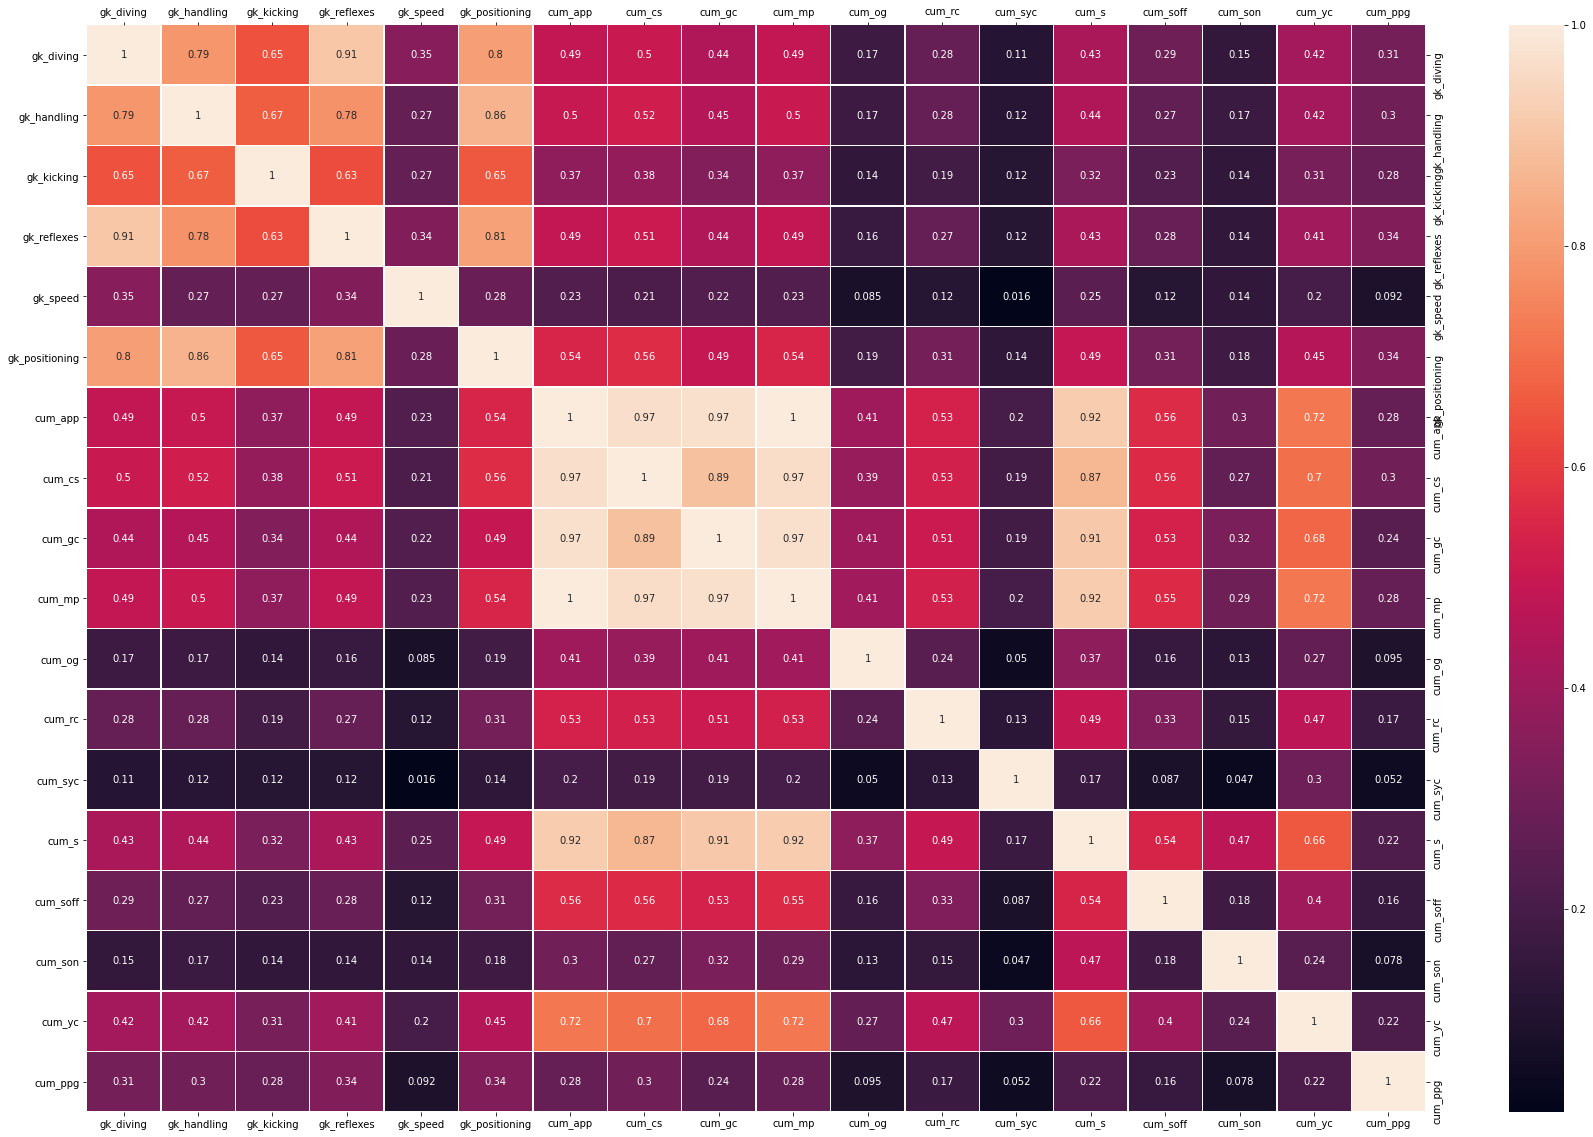

In [114]:
sofifa_real_hm = heat_map(gk_stats_float >> select(starts_with('gk'),starts_with('cum')))